In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout, Dense, SimpleRNN,Activation
from keras.models import Sequential
from keras.layers import GRU, LSTM
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read csv
data = pd.read_csv('D:/Project/Deep Learning/AS2/archive/stocks\A.csv',parse_dates=['Date'],index_col='Date')
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5.124000e+03
mean,34.090255,34.560553,33.629467,34.106245,31.778674,3.693250e+06
std,18.608831,18.834528,18.381718,18.611595,18.730529,2.481855e+06
min,7.653791,7.961373,7.510730,7.761087,6.674886,2.719000e+05
25%,21.101574,21.452074,20.785050,21.130186,18.790381,2.206475e+06
50%,27.328326,27.703863,27.010015,27.396280,24.714866,3.174050e+06
75%,41.500000,41.860001,41.130001,41.525204,39.203083,4.508075e+06
max,111.587982,115.879829,103.719597,113.733902,97.816307,6.254630e+07


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300
1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100
1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800
1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600
1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200


# Data Visualization

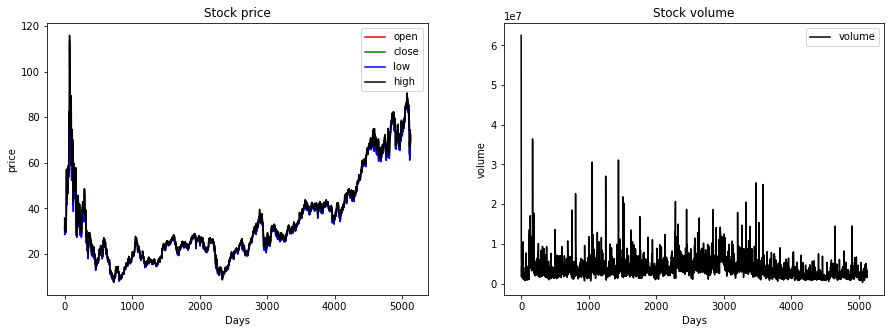

In [4]:
df=data
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(data["Open"].values, color='red', label='open')
plt.plot(data["Close"].values, color='green', label='close')
plt.plot(data["Low"].values, color='blue', label='low')
plt.plot(data["High"].values, color='black', label='high')
plt.title('Stock price')
plt.xlabel('Days')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(data["Volume"].values, color='black', label='volume')
plt.title('Stock volume')
plt.xlabel('Days')
plt.ylabel('volume')
plt.legend(loc='best');

# Data Preprocessing

In [5]:
#split data
train_set = data[:'2017'].iloc[:,1:2].values
test_set = data['2018':].iloc[:,1:2].values

In [6]:
print(len(train_set))
print(len(test_set))

4558
566


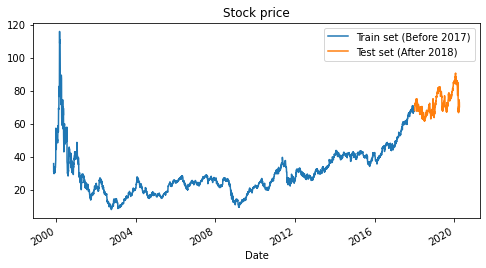

In [41]:
data["High"][:'2017'].plot(figsize=(8,4),legend=True)
data["High"]['2018':].plot(figsize=(8,4),legend=True)
plt.legend(['Train set (Before 2017)','Test set (After 2018)'])
plt.title('Stock price')
plt.show()

In [8]:
# Scaling the data set
sc = MinMaxScaler(feature_range=(0, 1))  
train_set_scaled = sc.fit_transform(train_set) 
test_set=sc.transform(test_set)

In [9]:
X_train = []
y_train = [] 
X_test = []
y_test = []

In [10]:
#create a data structure with 60 timesteps and 1 output
for i in range(60, len(train_set_scaled)):
    X_train.append(train_set_scaled[i - 60:i, 0])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [11]:
np.random.seed(1)
np.random.shuffle(X_train)
np.random.seed(1)
np.random.shuffle(y_train)
tf.random.set_seed(1)

In [12]:
#reshape data
X_train = np.reshape(X_train, (X_train.shape[0], 60, 1))

In [13]:
X_train.shape

(4498, 60, 1)

In [40]:
print(X_train)

[[[0.2506131 ]
  [0.24703388]
  [0.25690992]
  ...
  [0.17849805]
  [0.173792  ]
  [0.15874595]]

 [[0.15324451]
  [0.14999669]
  [0.15543183]
  ...
  [0.18174588]
  [0.18141445]
  [0.17810035]]

 [[0.56916549]
  [0.56170877]
  [0.57165109]
  ...
  [0.45441438]
  [0.45234306]
  [0.57579373]]

 ...

 [[0.05720156]
  [0.05819579]
  [0.06104594]
  ...
  [0.09252999]
  [0.08981242]
  [0.0898787 ]]

 [[0.26787471]
  [0.26898669]
  [0.26185167]
  ...
  [0.30707097]
  [0.3087389 ]
  [0.31355736]]

 [[0.26592432]
  [0.22656924]
  [0.22159807]
  ...
  [0.34504871]
  [0.37694703]
  [0.37363291]]]


In [23]:
dataset_total = pd.concat((data["High"][:'2017'],data["High"]['2018':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [24]:
X_test = []
y_test = []
for i in range(60, len(test_set)):
    X_test.append(test_set[i - 60:i, 0])
    y_test.append(test_set[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], 60, 1))    


In [25]:
X_test.shape

(506, 60, 1)

# Another RNN

In [46]:
RNN_model2 = Sequential()
#First layer
RNN_model2.add(SimpleRNN(units=50,activation='tanh',return_sequences=True,input_shape=(X_train.shape[1],1)))
RNN_model2.add(Dropout(0.2))
#Second layer
RNN_model2.add(SimpleRNN(units=50,activation='tanh', return_sequences=True))
RNN_model2.add(Dropout(0.2))
#Third layer
RNN_model2.add(SimpleRNN(units=50 ,activation='tanh',return_sequences=True))
RNN_model2.add(Dropout(0.2))
#Third layer
RNN_model2.add(SimpleRNN(units=50 ,activation='tanh',return_sequences=True))
RNN_model2.add(Dropout(0.2))
#Fourth layer
RNN_model2.add(SimpleRNN(units=100))
RNN_model2.add(Dropout(0.2))
#Output layer
RNN_model2.add(Dense(units=1))#Since the output value is the opening price of the 61st day, there is only one number, so Dense is 1

In [47]:
RNN_model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_14 (SimpleRNN)   (None, 60, 50)            2600      
                                                                 
 dropout_11 (Dropout)        (None, 60, 50)            0         
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 60, 50)            5050      
                                                                 
 dropout_12 (Dropout)        (None, 60, 50)            0         
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, 60, 50)            5050      
                                                                 
 dropout_13 (Dropout)        (None, 60, 50)            0         
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 60, 50)           

In [48]:
RNN_model2.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mean_squared_error')
history2=RNN_model2.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
141/141 [==============================] - 5s 23ms/step - loss: 0.2307
Epoch 2/50
141/141 [==============================] - 3s 23ms/step - loss: 0.0898
Epoch 3/50
141/141 [==============================] - 3s 23ms/step - loss: 0.0532
Epoch 4/50
141/141 [==============================] - 3s 23ms/step - loss: 0.0340
Epoch 5/50
141/141 [==============================] - 3s 23ms/step - loss: 0.0214
Epoch 6/50
141/141 [==============================] - 3s 23ms/step - loss: 0.0136
Epoch 7/50
141/141 [==============================] - 3s 24ms/step - loss: 0.0092
Epoch 8/50
141/141 [==============================] - 3s 24ms/step - loss: 0.0064
Epoch 9/50
141/141 [==============================] - 3s 24ms/step - loss: 0.0047
Epoch 10/50
141/141 [==============================] - 4s 25ms/step - loss: 0.0036
Epoch 11/50
141/141 [==============================] - 4s 25ms/step - loss: 0.0029
Epoch 12/50
141/141 [==============================] - 3s 24ms/step - loss: 0.0022
Epoch 13/50
1

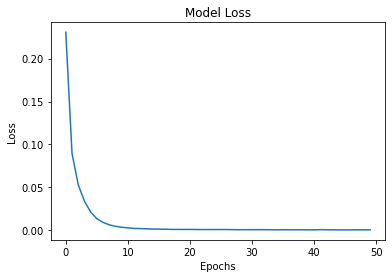

In [50]:
plt.plot(history2.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [51]:
predicted_stock_price = RNN_model2.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = sc.inverse_transform(test_set[60:])

16/16 [==============================] - 0s 8ms/step


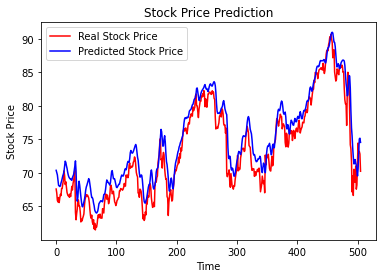

In [52]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [53]:
import math
#evaluate model
mse = mean_squared_error(predicted_stock_price, real_stock_price)
rmse = math.sqrt(mean_squared_error(predicted_stock_price, real_stock_price))
mae = mean_absolute_error(predicted_stock_price, real_stock_price)
print('mse: %.6f' % mse)
print('rmse: %.6f' % rmse)
print('mae: %.6f' % mae)

mse: 5.955315
rmse: 2.440351
mae: 2.001363


In [15]:
RNN_model3 = Sequential()
#First layer
RNN_model3.add(SimpleRNN(units=50,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],1)))
RNN_model3.add(Dropout(0.2))
#Second layer
RNN_model3.add(SimpleRNN(units=50,activation='relu', return_sequences=True))
RNN_model3.add(Dropout(0.2))
#Third layer
RNN_model3.add(SimpleRNN(units=50 ,activation='relu',return_sequences=True))
RNN_model3.add(Dropout(0.2))
#Third layer
RNN_model3.add(SimpleRNN(units=50 ,activation='relu',return_sequences=True))
RNN_model3.add(Dropout(0.2))
#Fourth layer
RNN_model3.add(SimpleRNN(units=100))
RNN_model3.add(Dropout(0.2))
#Output layer
RNN_model3.add(Dense(units=1))#Since the output value is the opening price of the 61st day, there is only one number, so Dense is 1

In [17]:
RNN_model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 60, 50)            2600      
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 60, 50)           

In [19]:
RNN_model3.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mean_squared_error')
history3=RNN_model3.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
141/141 [==============================] - 6s 26ms/step - loss: 0.0015
Epoch 2/50
141/141 [==============================] - 4s 26ms/step - loss: 0.0011
Epoch 3/50
141/141 [==============================] - 4s 27ms/step - loss: 0.0011
Epoch 4/50
141/141 [==============================] - 4s 27ms/step - loss: 9.4723e-04
Epoch 5/50
141/141 [==============================] - 4s 27ms/step - loss: 0.0011
Epoch 6/50
141/141 [==============================] - 4s 27ms/step - loss: 8.6930e-04
Epoch 7/50
141/141 [==============================] - 4s 27ms/step - loss: 9.1026e-04
Epoch 8/50
141/141 [==============================] - 4s 27ms/step - loss: 7.2061e-04
Epoch 9/50
141/141 [==============================] - 4s 27ms/step - loss: 8.3049e-04
Epoch 10/50
141/141 [==============================] - 4s 27ms/step - loss: 7.1600e-04
Epoch 11/50
141/141 [==============================] - 4s 27ms/step - loss: 7.4127e-04
Epoch 12/50
141/141 [==============================] - 4s 27ms/step 

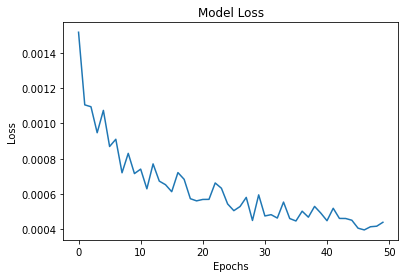

In [20]:
plt.plot(history3.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [48]:
predicted_stock_price = RNN_model3.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = sc.inverse_transform(test_set[60:])

16/16 [==============================] - 0s 9ms/step


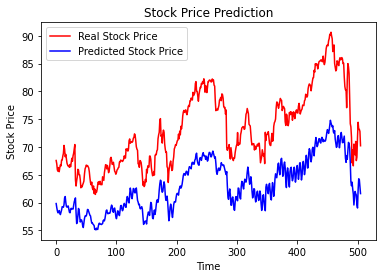

In [49]:

plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [27]:
import math
#evaluate model
mse = mean_squared_error(predicted_stock_price, real_stock_price)
rmse = math.sqrt(mean_squared_error(predicted_stock_price, real_stock_price))
mae = mean_absolute_error(predicted_stock_price, real_stock_price)
print('mse: %.6f' % mse)
print('rmse: %.6f' % rmse)
print('mae: %.6f' % mae)

mse: 107.295452
rmse: 10.358352
mae: 10.044533


In [31]:
RNN_model4 = Sequential()
#First layer
RNN_model4.add(SimpleRNN(units=50,activation='sigmoid',return_sequences=True,input_shape=(X_train.shape[1],1)))
RNN_model4.add(Dropout(0.2))
#Second layer
RNN_model4.add(SimpleRNN(units=50,activation='sigmoid', return_sequences=True))
RNN_model4.add(Dropout(0.2))
#Third layer
RNN_model4.add(SimpleRNN(units=50 ,activation='sigmoid',return_sequences=True))
RNN_model4.add(Dropout(0.2))
#Third layer
RNN_model4.add(SimpleRNN(units=50 ,activation='sigmoid',return_sequences=True))
RNN_model4.add(Dropout(0.2))
#Fourth layer
RNN_model4.add(SimpleRNN(units=100))
RNN_model4.add(Dropout(0.2))
#Output layer
RNN_model4.add(Dense(units=1))#Since the output value is the opening price of the 61st day, there is only one number, so Dense is 1

In [32]:
RNN_model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 60, 50)            2600      
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_9 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 60, 50)           

In [36]:
RNN_model4.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mean_squared_error')
history4=RNN_model4.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
141/141 [==============================] - 6s 28ms/step - loss: 0.0159
Epoch 2/50
141/141 [==============================] - 4s 25ms/step - loss: 0.0161
Epoch 3/50
141/141 [==============================] - 3s 25ms/step - loss: 0.0161
Epoch 4/50
141/141 [==============================] - 4s 25ms/step - loss: 0.0162
Epoch 5/50
141/141 [==============================] - 3s 25ms/step - loss: 0.0161
Epoch 6/50
141/141 [==============================] - 3s 24ms/step - loss: 0.0160
Epoch 7/50
141/141 [==============================] - 4s 25ms/step - loss: 0.0161
Epoch 8/50
141/141 [==============================] - 4s 27ms/step - loss: 0.0161
Epoch 9/50
141/141 [==============================] - 4s 25ms/step - loss: 0.0161
Epoch 10/50
141/141 [==============================] - 4s 27ms/step - loss: 0.0161
Epoch 11/50
141/141 [==============================] - 4s 28ms/step - loss: 0.0155
Epoch 12/50
141/141 [==============================] - 4s 26ms/step - loss: 0.0080
Epoch 13/50
1

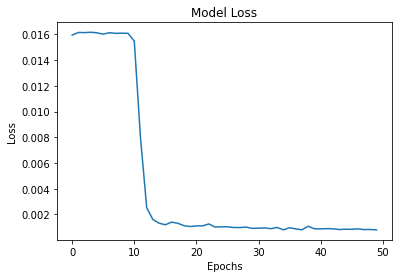

In [37]:
plt.plot(history4.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [52]:
predicted_stock_price = RNN_model4.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = sc.inverse_transform(test_set[60:])

16/16 [==============================] - 0s 10ms/step


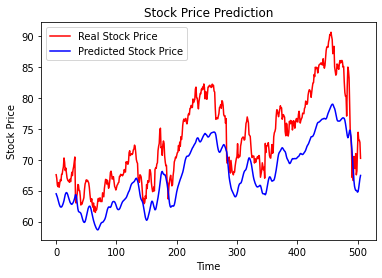

In [53]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [39]:
import math
#evaluate model
mse = mean_squared_error(predicted_stock_price, real_stock_price)
rmse = math.sqrt(mean_squared_error(predicted_stock_price, real_stock_price))
mae = mean_absolute_error(predicted_stock_price, real_stock_price)
print('mse: %.6f' % mse)
print('rmse: %.6f' % rmse)
print('mae: %.6f' % mae)

mse: 34.852006
rmse: 5.903559
mae: 5.409694


In [42]:
RNN_model5 = Sequential()
#First layer
RNN_model5.add(SimpleRNN(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
RNN_model5.add(Dropout(0.2))
#Second layer
RNN_model5.add(SimpleRNN(units=50, return_sequences=True))
RNN_model5.add(Dropout(0.2))
#Third layer
RNN_model5.add(SimpleRNN(units=50 ,return_sequences=True))
RNN_model5.add(Dropout(0.2))
#Third layer
RNN_model5.add(SimpleRNN(units=50,return_sequences=True))
RNN_model5.add(Dropout(0.2))
#Fourth layer
RNN_model5.add(SimpleRNN(units=100))
RNN_model5.add(Dropout(0.2))
#Output layer
RNN_model5.add(Dense(units=1))#Since the output value is the opening price of the 61st day, there is only one number, so Dense is 1

In [43]:
RNN_model5.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mean_squared_error')
history5=RNN_model5.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
141/141 [==============================] - 6s 25ms/step - loss: 0.2251
Epoch 2/50
141/141 [==============================] - 4s 26ms/step - loss: 0.0947
Epoch 3/50
141/141 [==============================] - 3s 24ms/step - loss: 0.0539
Epoch 4/50
141/141 [==============================] - 3s 25ms/step - loss: 0.0327
Epoch 5/50
141/141 [==============================] - 4s 25ms/step - loss: 0.0210
Epoch 6/50
141/141 [==============================] - 4s 25ms/step - loss: 0.0135
Epoch 7/50
141/141 [==============================] - 4s 26ms/step - loss: 0.0094
Epoch 8/50
141/141 [==============================] - 3s 24ms/step - loss: 0.0067
Epoch 9/50
141/141 [==============================] - 3s 24ms/step - loss: 0.0049
Epoch 10/50
141/141 [==============================] - 3s 24ms/step - loss: 0.0039
Epoch 11/50
141/141 [==============================] - 4s 25ms/step - loss: 0.0032
Epoch 12/50
141/141 [==============================] - 3s 25ms/step - loss: 0.0028
Epoch 13/50
1

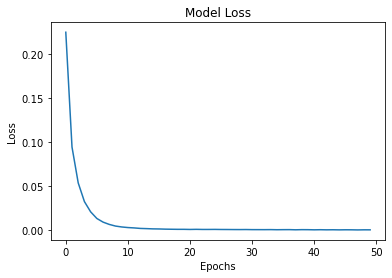

In [44]:
plt.plot(history5.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [50]:
predicted_stock_price = RNN_model5.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = sc.inverse_transform(test_set[60:])

16/16 [==============================] - 0s 9ms/step


In [46]:
#evaluate model
mse = mean_squared_error(predicted_stock_price, real_stock_price)
rmse = math.sqrt(mean_squared_error(predicted_stock_price, real_stock_price))
mae = mean_absolute_error(predicted_stock_price, real_stock_price)
print('mse: %.6f' % mse)
print('rmse: %.6f' % rmse)
print('mae: %.6f' % mae)

mse: 17.270771
rmse: 4.155812
mae: 3.441610


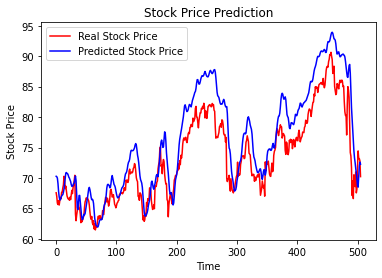

In [47]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# LSTM

In [151]:
LSTM_model = Sequential()
#First layer
LSTM_model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
LSTM_model.add(Dropout(0.2))
#Second layer
LSTM_model.add(LSTM(units=50, return_sequences=True))
LSTM_model.add(Dropout(0.2))
#Third layer
LSTM_model.add(LSTM(units=50, return_sequences=True))
LSTM_model.add(Dropout(0.2))
#Third layer
LSTM_model.add(LSTM(units=50, return_sequences=True))
LSTM_model.add(Dropout(0.2))
#Fourth layer
LSTM_model.add(LSTM(units=50))
LSTM_model.add(Dropout(0.2))
#Output layer
LSTM_model.add(Dense(units=1))#Since the output value is the opening price of the 61st day, there is only one number, so Dense is 1

In [152]:
LSTM_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_21 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_22 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_23 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 50)           

In [153]:
LSTM_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mean_squared_error')
history3=LSTM_model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
141/141 [==============================] - 14s 58ms/step - loss: 0.0037
Epoch 2/50
141/141 [==============================] - 8s 59ms/step - loss: 0.0017
Epoch 3/50
141/141 [==============================] - 8s 60ms/step - loss: 0.0014
Epoch 4/50
141/141 [==============================] - 8s 59ms/step - loss: 0.0012
Epoch 5/50
141/141 [==============================] - 8s 59ms/step - loss: 0.0011
Epoch 6/50
141/141 [==============================] - 8s 58ms/step - loss: 0.0010
Epoch 7/50
141/141 [==============================] - 8s 59ms/step - loss: 9.2224e-04
Epoch 8/50
141/141 [==============================] - 8s 57ms/step - loss: 8.5674e-04
Epoch 9/50
141/141 [==============================] - 8s 59ms/step - loss: 8.1490e-04
Epoch 10/50
141/141 [==============================] - 8s 58ms/step - loss: 8.6613e-04
Epoch 11/50
141/141 [==============================] - 8s 59ms/step - loss: 7.2198e-04
Epoch 12/50
141/141 [==============================] - 8s 59ms/step - loss:

In [158]:
predicted_stock_price = LSTM_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = sc.inverse_transform(test_set[60:])

16/16 [==============================] - 2s 19ms/step


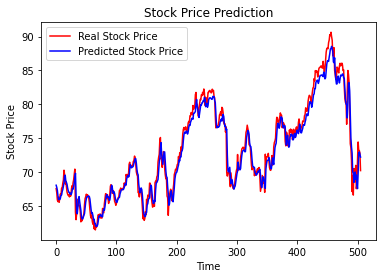

In [159]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [160]:
import math
#evaluate model
mse = mean_squared_error(predicted_stock_price, real_stock_price)
rmse = math.sqrt(mean_squared_error(predicted_stock_price, real_stock_price))
mae = mean_absolute_error(predicted_stock_price, real_stock_price)
print('mse: %.6f' % mse)
print('rmse: %.6f' % rmse)
print('mae: %.6f' % mae)

mse: 1.860259
rmse: 1.363913
mae: 1.030905


# GRU

In [162]:
GRU_model = Sequential()
#First layer
GRU_model.add(GRU(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
GRU_model.add(Dropout(0.2))
#Second layer
GRU_model.add(GRU(units=50, return_sequences=True))
GRU_model.add(Dropout(0.2))
#Third layer
GRU_model.add(GRU(units=50, return_sequences=True))
GRU_model.add(Dropout(0.2))
#Third layer
GRU_model.add(GRU(units=50, return_sequences=True))
GRU_model.add(Dropout(0.2))
#Fourth layer
GRU_model.add(GRU(units=50))
GRU_model.add(Dropout(0.2))
#Output layer
GRU_model.add(Dense(units=1))#Since the output value is the opening price of the 61st day, there is only one number, so Dense is 1

In [163]:
GRU_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 60, 50)            7950      
                                                                 
 dropout_28 (Dropout)        (None, 60, 50)            0         
                                                                 
 gru_5 (GRU)                 (None, 60, 50)            15300     
                                                                 
 dropout_29 (Dropout)        (None, 60, 50)            0         
                                                                 
 gru_6 (GRU)                 (None, 60, 50)            15300     
                                                                 
 dropout_30 (Dropout)        (None, 60, 50)            0         
                                                                 
 gru_7 (GRU)                 (None, 60, 50)          

In [164]:
GRU_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mean_squared_error')
history4=GRU_model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
141/141 [==============================] - 14s 57ms/step - loss: 0.0030
Epoch 2/50
141/141 [==============================] - 8s 56ms/step - loss: 0.0011
Epoch 3/50
141/141 [==============================] - 8s 56ms/step - loss: 9.8256e-04
Epoch 4/50
141/141 [==============================] - 8s 56ms/step - loss: 9.2419e-04
Epoch 5/50
141/141 [==============================] - 8s 56ms/step - loss: 7.2125e-04
Epoch 6/50
141/141 [==============================] - 8s 56ms/step - loss: 8.5366e-04
Epoch 7/50
141/141 [==============================] - 8s 56ms/step - loss: 7.7639e-04
Epoch 8/50
141/141 [==============================] - 8s 56ms/step - loss: 7.7489e-04
Epoch 9/50
141/141 [==============================] - 8s 56ms/step - loss: 6.4067e-04
Epoch 10/50
141/141 [==============================] - 8s 56ms/step - loss: 5.6832e-04
Epoch 11/50
141/141 [==============================] - 8s 56ms/step - loss: 5.5238e-04
Epoch 12/50
141/141 [==============================] - 8s 5

In [165]:
predicted_stock_price = GRU_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = sc.inverse_transform(test_set[60:])

16/16 [==============================] - 1s 15ms/step


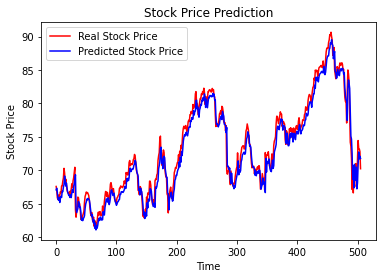

In [166]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [167]:
import math
#evaluate model
mse = mean_squared_error(predicted_stock_price, real_stock_price)
rmse = math.sqrt(mean_squared_error(predicted_stock_price, real_stock_price))
mae = mean_absolute_error(predicted_stock_price, real_stock_price)
print('mse: %.6f' % mse)
print('rmse: %.6f' % rmse)
print('mae: %.6f' % mae)

mse: 1.981641
rmse: 1.407708
mae: 1.104697
